### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:   Леонова Алина
##### Группа:    НФИбд-02-17

### Москва 2020
***

### Вариант №21
Arrhythmia Data Set  

Название файла: arrhythmia.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Arrhythmia 

Первый признак: Q wave of channel DI (столбец No 161) 

Второй признак: R wave of channel DI (столбец No 162) 

Третий признак: S wave of channel DI (столбец No 163) 

Класс: Sex (столбец No 2) 


***
#### Постановка задачи:
1.         Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

 

2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

 

3. Масштабируйте признаки набора данных на интервал от 0 до 1.

 

4.         Визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

 

5.         Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью наивного байесовского классификатора.

 

6. Постройте и выведите на экран отчет о классификации и матрицу ошибок.

 

7. Найдите точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам.

 

8.         Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.

 

9. Найдите точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.

 

10. Определите, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам.

 

11.       Проведите классификацию точек набора данных лучшим методом и визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.
***

**1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.**

	Первый признак: Q wave of channel DI (столбец No 161) 

	Второй признак: R wave of channel DI (столбец No 162) 

	Третий признак: S wave of channel DI (столбец No 163) 

	Класс: Sex (столбец No 2)

In [1]:
import numpy as np
import pandas as pd

url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data"
data = pd.read_csv( url, header=None, prefix="V", usecols = [2-1, 161-1, 162-1, 163-1])
print(data[0:5])

   V1  V160  V161  V162
0   0   0.0   6.1  -1.0
1   1   0.0   7.2   0.0
2   0   0.0   4.5  -2.8
3   0   0.0   7.8  -0.7
4   0   0.0   5.2  -1.4


**2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.**

In [2]:
df = data.replace('?',np.NaN)

print( "Типы:\n", df.dtypes)
print('\nЧисло записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))

print('Число отсутствующих значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Типы:
 V1        int64
V160    float64
V161    float64
V162    float64
dtype: object

Число записей = 452
Число признаков = 4
Число отсутствующих значений:
	V1: 0
	V160: 0
	V161: 0
	V162: 0


Набор полон.

**3. Масштабируйте признаки набора данных на интервал от 0 до 1.**

In [3]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

X = data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.    1.    0.307 0.928]
 [1.    1.    0.362 1.   ]
 [0.    1.    0.226 0.797]
 [0.    1.    0.392 0.949]
 [0.    1.    0.261 0.899]]


**4.         Визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.**

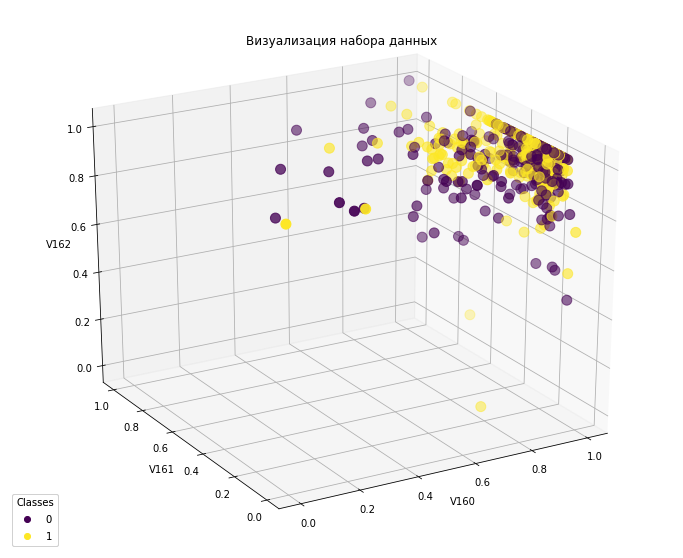

In [4]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = rescaledX[:,1]
ys = rescaledX[:,2]
zs = rescaledX[:,3]
c = rescaledX[:,0]

sc = ax.scatter( xs, ys, zs, c=c, s=100)

leg = ax.legend(*sc.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(leg)

ax.set_xlabel('V160')
ax.set_ylabel('V161')
ax.set_zlabel('V162')
ax.view_init( azim=-120, elev=25 )
ax.set_title('Визуализация набора данных')
plt.show()

**5       Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью наивного байесовского классификатора.**


In [5]:
resX = pd.DataFrame(data=rescaledX, columns=["V1", "V160", "V161", "V162"])
resX[['V1']] = resX[['V1']].astype(int)
print(resX[0:5])

   V1  V160      V161      V162
0   0   1.0  0.306533  0.927536
1   1   1.0  0.361809  1.000000
2   0   1.0  0.226131  0.797101
3   0   1.0  0.391960  0.949275
4   0   1.0  0.261307  0.898551


Разделение набора

In [6]:
from sklearn.model_selection import train_test_split

test_size=0.25 # тестовая выборка 25%

X = resX.drop('V1',axis=1)
y = resX['V1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
# random_state чтобы деление не менялось

Наивная байесовская классификация

In [7]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train);

y_pred_bayes = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred_bayes))
print('Количество неправильно классифицированных точек из {} точек тестового множества равно {}'.format(len(y_test),mislabel))

Количество неправильно классифицированных точек из 113 точек тестового множества равно 49


**6. Постройте и выведите на экран отчет о классификации и матрицу ошибок.**

In [8]:
from sklearn.metrics import classification_report
print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred_bayes))

Отчет о классификации:

              precision    recall  f1-score   support

           0       0.52      0.24      0.33        50
           1       0.58      0.83      0.68        63

    accuracy                           0.57       113
   macro avg       0.55      0.53      0.50       113
weighted avg       0.55      0.57      0.52       113



In [9]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred_bayes))
cmdf = pd.DataFrame(cm,index=[0,1], columns=[0,1])
print("Матрица ошибок:\n", cmdf)

Матрица ошибок:
     0   1
0  12  38
1  11  52


**7. Найдите точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам.**

In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 5
kfold = KFold(n_splits=num_folds)

res_bayes = cross_val_score(nbc, X, y, cv=kfold)
print("Точность: {:.3f} ({:.3f})".format(res_bayes.mean()*100.0, res_bayes.std()*100.0))

Точность: 57.944 (6.625)


**8.         Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.**

Text(0, 0.5, 'Доля ошибок')

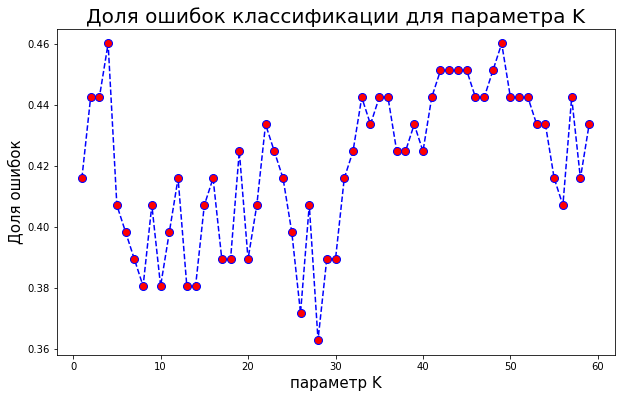

In [11]:
# масштабирование признаков и разбиение набора уже были сделаны ранее 

from sklearn.neighbors import KNeighborsClassifier

# поиск наилучшего числа соседей
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Доля ошибок классификации для параметра K', fontsize=20)
plt.xlabel('параметр K',fontsize=15)
plt.ylabel('Доля ошибок',fontsize=15)

Судя по графику, с таким разбиением меньше всего ошибок с K=28

**9. Найдите точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.**

In [12]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
conf_mat=confusion_matrix(y_test,pred)
print("Матрица ошибок:\n", conf_mat)
print("Отчет о классификации:\n", classification_report(y_test,pred))
print("Доля ошибок неправильной классификации:",round(np.mean(pred!=y_test),3))

# Кросс-валидация
num_folds = 5
kfold = KFold(n_splits=num_folds)

res_knn = cross_val_score(knn, X, y, cv=kfold)
print("Точность: {:.3f} ({:.3f})".format(res_knn.mean()*100.0, res_knn.std()*100.0))

Матрица ошибок:
 [[17 33]
 [ 8 55]]
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.68      0.34      0.45        50
           1       0.62      0.87      0.73        63

    accuracy                           0.64       113
   macro avg       0.65      0.61      0.59       113
weighted avg       0.65      0.64      0.61       113

Доля ошибок неправильной классификации: 0.363
Точность: 55.509 (6.310)


**10. Определите, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам.**

In [13]:
print('Точность классификации при кросс-валидации по 5 блокам\n')
print('\tНаивной байесовской : {:.3f} ({:.3f})'.format(res_bayes.mean()*100.0, res_bayes.std()*100.0))
print('\tК ближайших соседей : {:.3f} ({:.3f})'.format(res_knn.mean()*100.0, res_knn.std()*100.0))

Точность классификации при кросс-валидации по 5 блокам

	Наивной байесовской : 57.944 (6.625)
	К ближайших соседей : 55.509 (6.310)


Метод наивной бейсовской классификации показал большую точность

**11.       Проведите классификацию точек набора данных лучшим методом и визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.**

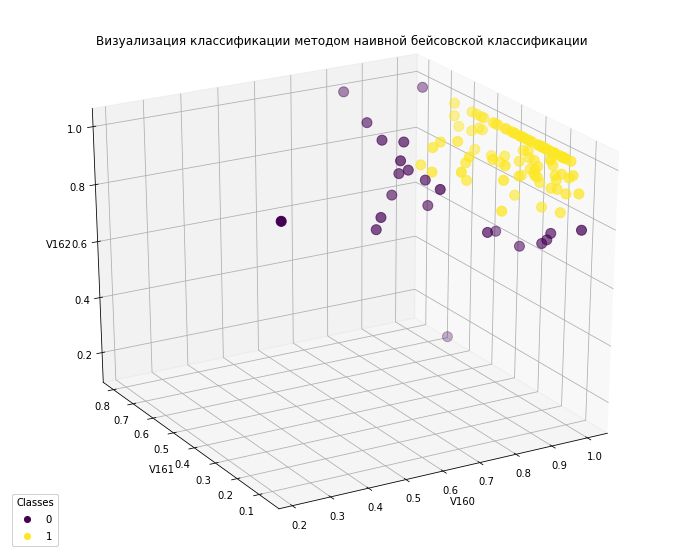

In [14]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = np.array(X_test['V160'])
ys = np.array(X_test['V161'])
zs = np.array(X_test['V162'])
c = y_pred_bayes

sc = ax.scatter( xs, ys, zs, c=c, s=100)

leg = ax.legend(*sc.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(leg)

ax.set_xlabel('V160')
ax.set_ylabel('V161')
ax.set_zlabel('V162')
ax.view_init( azim=-120, elev=25 )
ax.set_title('Визуализация классификации методом наивной бейсовской классификации')
plt.show()

Тренироваочные + спрогронизорованные :

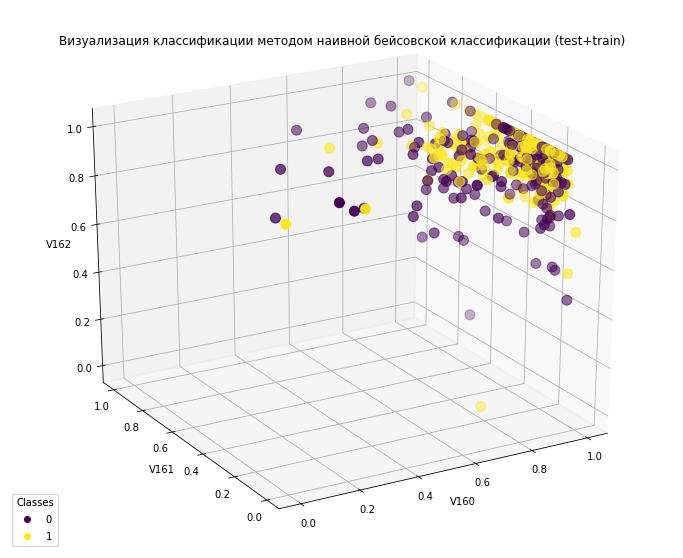

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# тренировочные
xs = np.array(X_train['V160'])
ys = np.array(X_train['V161'])
zs = np.array(X_train['V162'])
c = y_train

sc = ax.scatter( xs, ys, zs, c=c, s=100)

# спрогнозированные
xs = np.array(X_test['V160'])
ys = np.array(X_test['V161'])
zs = np.array(X_test['V162'])
c = y_pred_bayes

sc = ax.scatter( xs, ys, zs, c=c, s=100)

leg = ax.legend(*sc.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(leg)
ax.set_xlabel('V160')
ax.set_ylabel('V161')
ax.set_zlabel('V162')
ax.view_init( azim=-120, elev=25 )
ax.set_title('Визуализация классификации методом наивной бейсовской классификации (test+train)')
plt.show()

Ещё раз реальный набор :

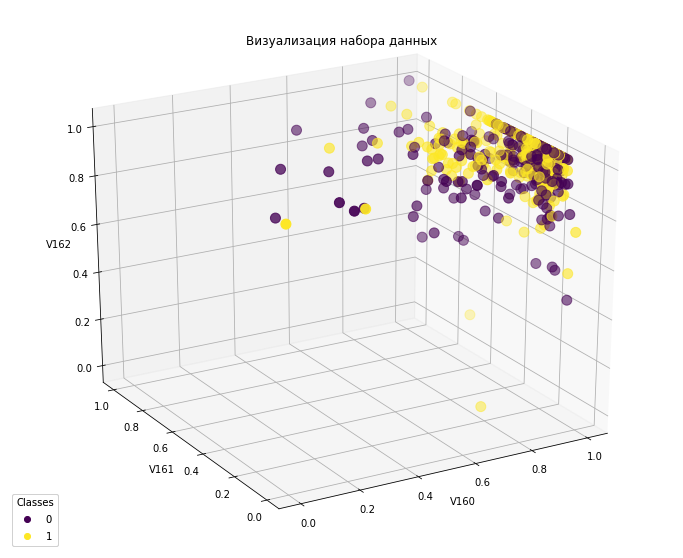

In [16]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = rescaledX[:,1]
ys = rescaledX[:,2]
zs = rescaledX[:,3]
c = rescaledX[:,0]

sc = ax.scatter( xs, ys, zs, c=c, s=100)

leg = ax.legend(*sc.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(leg)

ax.set_xlabel('V160')
ax.set_ylabel('V161')
ax.set_zlabel('V162')
ax.view_init( azim=-120, elev=25 )
ax.set_title('Визуализация набора данных')
plt.show()

Визуально вышло довольно близко к правде